In [ ]:
# Deep Learning 

# 1. ANN 
# 2. CNN 
# 3. RNN : LSTM 
# 4. Auto Encoders 

# Natural Language Processing [nltk]
# Computer Vision (cv2 )

##  Project : Lending Data Analysis 

In [ ]:
Problem Statement:  


For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.


A quick look at what the columns in the dataset represent:

credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

installment: The monthly installments owed by the borrower if the loan is funded.

log.annual.inc: The natural log of the self-reported annual income of the borrower.

dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

fico: The FICO credit score of the borrower.

days.with.cr.line: The number of days the borrower has had a credit line.

revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [ ]:
df['']

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv('loan_data.csv')

In [4]:
df.shape

(9578, 14)

In [5]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

Tasks:

1.     Feature Transformation

Transform categorical values into numerical values (discrete)

2.     Exploratory data analysis of different factors of the dataset.

3.     Additional Feature Engineering

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features

4.     Modeling

After applying EDA and feature engineering, you are now ready to build the predictive models

In this part, you will create a deep learning model using Keras with Tensorflow backend.

In [7]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [9]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [10]:
# Null Values 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [11]:
# 1. Exploratory Data Analysis 

In [12]:
# Objective : To Predict whether Loan will be repaid or not.

In [13]:
# 1. Calculate % of unpaid loans.

df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [24]:
# % of Unpaid loans 

print(f"Percentage Count of Unpaid Loan , {df['not.fully.paid'].value_counts()[1] / df.shape[0] }")

Percentage Count of Unpaid Loan , 0.16005429108373356


In [40]:
# 2. Find count of Purpose for which loan is availed and Display it.

p1 = df['purpose'].value_counts()

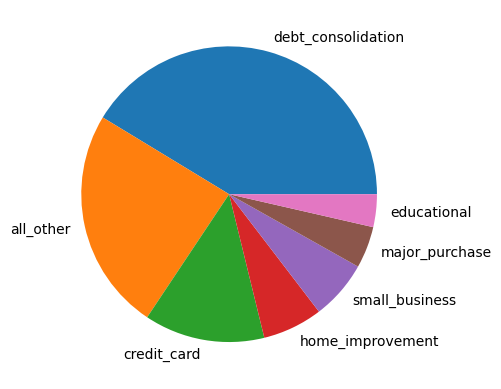

In [41]:
# Pie Chart 
plt.pie(df['purpose'].value_counts(), labels= p1.index, )
plt.show()

<Axes: >

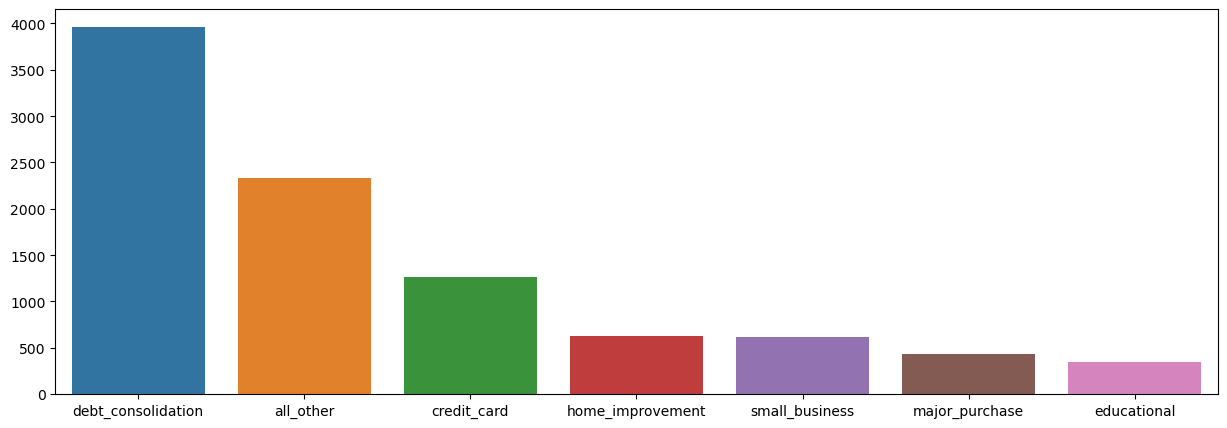

In [44]:
plt.figure(figsize = (15,5))
sns.barplot(x = p1.index, y = p1.values)

In [46]:
# Display Median interest Rate 

df['int.rate'].median()

0.1221

In [47]:
# Display IQR for interest rates.

df['int.rate'].describe()

count    9578.000000
mean        0.122640
std         0.026847
min         0.060000
25%         0.103900
50%         0.122100
75%         0.140700
max         0.216400
Name: int.rate, dtype: float64

In [49]:
# DIsplay median interest rate for each purpose.

df.groupby(df['purpose'])['int.rate'].median() * 100

purpose
all_other             11.83
credit_card           11.89
debt_consolidation    12.80
educational           12.18
home_improvement      11.83
major_purchase        11.58
small_business        13.79
Name: int.rate, dtype: float64

In [ ]:
# 

In [50]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [ ]:
# Display median of interest rate for 'credit.policy' , 

In [52]:
df['credit.policy'].value_counts()

# 7710 meets loan criterion , 1868 does not meet loan criterion 

1    7710
0    1868
Name: credit.policy, dtype: int64

In [55]:
np.round(df['credit.policy'].value_counts() / df.shape[0] * 100, 2)

1    80.5
0    19.5
Name: credit.policy, dtype: float64

In [58]:
# Display median of interest rate for 'credit.policy'

df.groupby(df['credit.policy'])['int.rate'].median() * 100


credit.policy
0    13.87
1    11.89
Name: int.rate, dtype: float64

In [71]:
# # Display median of interest rate for 'credit.policy' for each purpose.

df.groupby(['credit.policy', 'purpose'])['int.rate'].median().unstack() * 100

purpose,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
credit.policy,,,,,,,
0,13.43,13.795,14.26,13.75,13.92,13.23,14.42
1,11.48,11.580,12.53,11.66,11.48,11.26,13.47


In [73]:
# Find Number / % of people who paid loan wrt 'credit.policy'.

In [75]:
df.groupby('credit.policy')['not.fully.paid'].value_counts().unstack()

not.fully.paid,0,1
credit.policy,,
0,1349,519
1,6696,1014


In [76]:
# FInd loan paid wrt purpose.

df.groupby('purpose')['not.fully.paid'].value_counts().unstack()

not.fully.paid,0,1
purpose,,
all_other,1944,387
credit_card,1116,146
debt_consolidation,3354,603
educational,274,69
home_improvement,522,107
major_purchase,388,49
small_business,447,172
